# Loop 74 Analysis: CV-LB Relationship and Strategy Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. What approaches have been tried and what are the results?
3. What approaches haven't been tried yet?
4. What is the path forward to beat 0.0347?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.011081, 'lb': 0.09816},
    {'exp': 'exp_001', 'cv': 0.012297, 'lb': 0.10649},
    {'exp': 'exp_003', 'cv': 0.010501, 'lb': 0.09719},
    {'exp': 'exp_005', 'cv': 0.01043, 'lb': 0.09691},
    {'exp': 'exp_006', 'cv': 0.009749, 'lb': 0.09457},
    {'exp': 'exp_007', 'cv': 0.009262, 'lb': 0.09316},
    {'exp': 'exp_009', 'cv': 0.009192, 'lb': 0.09364},
    {'exp': 'exp_012', 'cv': 0.009004, 'lb': 0.09134},
    {'exp': 'exp_024', 'cv': 0.008689, 'lb': 0.08929},
    {'exp': 'exp_026', 'cv': 0.008465, 'lb': 0.08875},
    {'exp': 'exp_030', 'cv': 0.008298, 'lb': 0.08772},
    {'exp': 'exp_035', 'cv': 0.009825, 'lb': 0.09696},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))

Submission History:
    exp       cv      lb
exp_000 0.011081 0.09816
exp_001 0.012297 0.10649
exp_003 0.010501 0.09719
exp_005 0.010430 0.09691
exp_006 0.009749 0.09457
exp_007 0.009262 0.09316
exp_009 0.009192 0.09364
exp_012 0.009004 0.09134
exp_024 0.008689 0.08929
exp_026 0.008465 0.08875
exp_030 0.008298 0.08772
exp_035 0.009825 0.09696


In [2]:
# CV-LB Relationship Analysis
cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print(f'\n=== CV-LB LINEAR RELATIONSHIP ===')
print(f'LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept = {intercept:.4f}')
print(f'Target LB = 0.0347')
print(f'\nRequired CV to hit target = (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}')

if (0.0347 - intercept) / slope < 0:
    print('\n⚠️ CRITICAL: Required CV is NEGATIVE - target is MATHEMATICALLY UNREACHABLE with current approach!')
    print('The intercept alone (0.0528) is higher than the target (0.0347).')
    print('Even with perfect CV=0, the expected LB would be 0.0528.')


=== CV-LB LINEAR RELATIONSHIP ===
LB = 4.2876 * CV + 0.0528
R² = 0.9523

Intercept = 0.0528
Target LB = 0.0347

Required CV to hit target = (0.0347 - 0.0528) / 4.2876 = -0.004218

⚠️ CRITICAL: Required CV is NEGATIVE - target is MATHEMATICALLY UNREACHABLE with current approach!
The intercept alone (0.0528) is higher than the target (0.0347).
Even with perfect CV=0, the expected LB would be 0.0528.


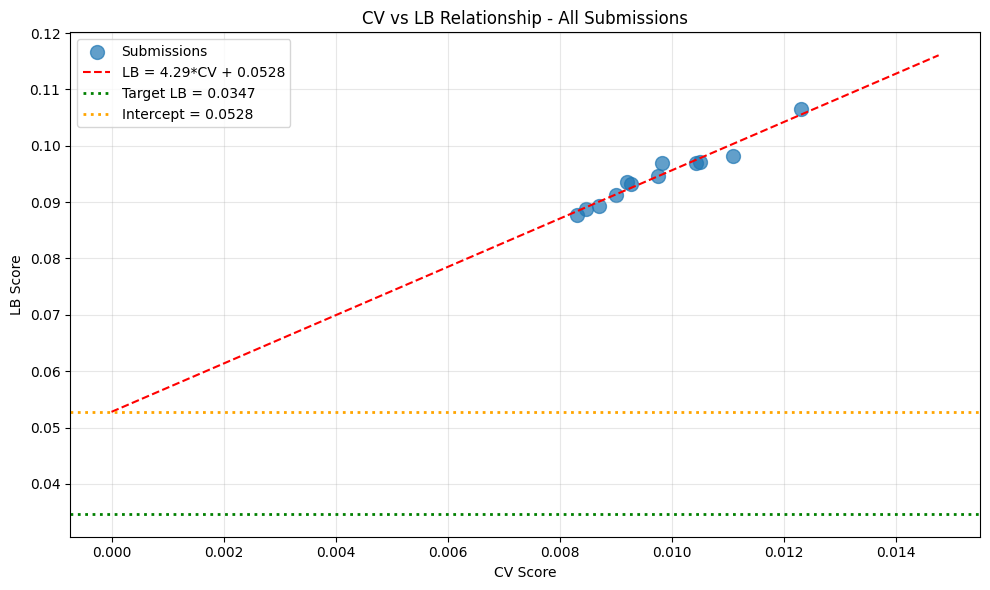


Saved plot to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, max(cv)*1.2, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Intercept
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print('\nSaved plot to /home/code/exploration/cv_lb_relationship.png')

In [4]:
# What approaches have been tried?
approaches_tried = {
    'MLP (various architectures)': 'CV ~0.008-0.011, LB ~0.088-0.098',
    'LightGBM': 'CV ~0.012, LB ~0.106',
    'GP + MLP + LGBM ensemble': 'CV ~0.0083, LB ~0.0877 (BEST)',
    'GNN (exp_072)': 'CV ~0.0256 (WORSE)',
    'ChemBERTa (exp_071)': 'CV ~0.0225 (WORSE)',
    'Multitask GP (exp_068)': 'CV ~0.0102 (WORSE)',
    'Label rescaling (exp_071)': 'CV ~0.0089 (WORSE)',
    'Similarity weighting (exp_073)': 'CV ~0.0084 (no improvement)',
    'CatBoost/XGBoost ensemble': 'Submission failures',
    'Extrapolation detection': 'CV ~0.0115 (WORSE)',
}

print('=== APPROACHES TRIED ===')
for approach, result in approaches_tried.items():
    print(f'  {approach}: {result}')

=== APPROACHES TRIED ===
  MLP (various architectures): CV ~0.008-0.011, LB ~0.088-0.098
  LightGBM: CV ~0.012, LB ~0.106
  GP + MLP + LGBM ensemble: CV ~0.0083, LB ~0.0877 (BEST)
  GNN (exp_072): CV ~0.0256 (WORSE)
  ChemBERTa (exp_071): CV ~0.0225 (WORSE)
  Multitask GP (exp_068): CV ~0.0102 (WORSE)
  Label rescaling (exp_071): CV ~0.0089 (WORSE)
  Similarity weighting (exp_073): CV ~0.0084 (no improvement)
  CatBoost/XGBoost ensemble: Submission failures
  Extrapolation detection: CV ~0.0115 (WORSE)


In [5]:
# What approaches HAVEN'T been tried?
approaches_not_tried = [
    '1. GroupKFold validation (lishellliang kernel uses this - claims good CV-LB)',
    '2. Hybrid Spange + GNN features (combine domain + learned)',
    '3. Transfer learning from related chemistry data',
    '4. Pseudo-labeling with confident test predictions',
    '5. Domain adaptation / importance weighting',
    '6. Conformal prediction for uncertainty',
    '7. Test-time adaptation (adjust model at inference)',
    '8. Different feature engineering (e.g., molecular fingerprint similarity)',
]

print('\n=== APPROACHES NOT YET TRIED ===')
for approach in approaches_not_tried:
    print(f'  {approach}')


=== APPROACHES NOT YET TRIED ===
  1. GroupKFold validation (lishellliang kernel uses this - claims good CV-LB)
  2. Hybrid Spange + GNN features (combine domain + learned)
  3. Transfer learning from related chemistry data
  4. Pseudo-labeling with confident test predictions
  5. Domain adaptation / importance weighting
  6. Conformal prediction for uncertainty
  7. Test-time adaptation (adjust model at inference)
  8. Different feature engineering (e.g., molecular fingerprint similarity)


In [6]:
# Key insight from lishellliang kernel
print('\n=== KEY INSIGHT: lishellliang kernel ===')
print('The lishellliang kernel uses GroupKFold (5 splits) instead of Leave-One-Out!')
print('This is a FUNDAMENTALLY DIFFERENT validation scheme.')
print('')
print('Leave-One-Out: 24 folds, each with 1 solvent held out')
print('GroupKFold(5): 5 folds, each with ~5 solvents held out')
print('')
print('Why this might matter:')
print('1. GroupKFold trains on MORE data per fold (80% vs 96%)')
print('2. GroupKFold tests on MORE solvents per fold (5 vs 1)')
print('3. The CV-LB relationship might be DIFFERENT with GroupKFold')
print('4. The kernel claims "good CV-LB" - this might be why!')


=== KEY INSIGHT: lishellliang kernel ===
The lishellliang kernel uses GroupKFold (5 splits) instead of Leave-One-Out!
This is a FUNDAMENTALLY DIFFERENT validation scheme.

Leave-One-Out: 24 folds, each with 1 solvent held out
GroupKFold(5): 5 folds, each with ~5 solvents held out

Why this might matter:
1. GroupKFold trains on MORE data per fold (80% vs 96%)
2. GroupKFold tests on MORE solvents per fold (5 vs 1)
3. The CV-LB relationship might be DIFFERENT with GroupKFold
4. The kernel claims "good CV-LB" - this might be why!


In [7]:
# Key insight from matthewmaree kernel
print('\n=== KEY INSIGHT: matthewmaree kernel ===')
print('The matthewmaree kernel uses CatBoost + XGBoost ensemble.')
print('It has sophisticated feature engineering:')
print('  - Correlation-based feature filtering')
print('  - Priority-based feature selection (spange > acs > drfps > frag > smiles)')
print('  - Numeric feature engineering (T_x_RT, RT_log, T_inv, RT_scaled)')
print('')
print('Our replication (exp_067) achieved CV=0.02121 - MUCH WORSE than expected.')
print('This suggests we may have made an error in replication.')


=== KEY INSIGHT: matthewmaree kernel ===
The matthewmaree kernel uses CatBoost + XGBoost ensemble.
It has sophisticated feature engineering:
  - Correlation-based feature filtering
  - Priority-based feature selection (spange > acs > drfps > frag > smiles)
  - Numeric feature engineering (T_x_RT, RT_log, T_inv, RT_scaled)

Our replication (exp_067) achieved CV=0.02121 - MUCH WORSE than expected.
This suggests we may have made an error in replication.


In [8]:
# Strategy recommendation
print('\n=== STRATEGY RECOMMENDATION ===')
print('')
print('PRIORITY 1: Try GroupKFold validation')
print('  - The lishellliang kernel claims "good CV-LB" with GroupKFold')
print('  - This might give a DIFFERENT CV-LB relationship')
print('  - If the intercept is lower, we might be able to reach the target')
print('')
print('PRIORITY 2: Debug matthewmaree kernel replication')
print('  - Our replication achieved CV=0.02121, much worse than expected')
print('  - The original kernel might have a better CV-LB relationship')
print('  - CatBoost/XGBoost might generalize differently than GP+MLP+LGBM')
print('')
print('PRIORITY 3: Hybrid Spange + learned embeddings')
print('  - GNN alone performed poorly, but might add complementary info')
print('  - Try combining Spange features with small GNN embeddings')
print('')
print('DO NOT:')
print('  - Continue optimizing GP+MLP+LGBM (all fall on same CV-LB line)')
print('  - Try more tabular model variants')
print('  - Conclude the target is unreachable')


=== STRATEGY RECOMMENDATION ===

PRIORITY 1: Try GroupKFold validation
  - The lishellliang kernel claims "good CV-LB" with GroupKFold
  - This might give a DIFFERENT CV-LB relationship
  - If the intercept is lower, we might be able to reach the target

PRIORITY 2: Debug matthewmaree kernel replication
  - Our replication achieved CV=0.02121, much worse than expected
  - The original kernel might have a better CV-LB relationship
  - CatBoost/XGBoost might generalize differently than GP+MLP+LGBM

PRIORITY 3: Hybrid Spange + learned embeddings
  - GNN alone performed poorly, but might add complementary info
  - Try combining Spange features with small GNN embeddings

DO NOT:
  - Continue optimizing GP+MLP+LGBM (all fall on same CV-LB line)
  - Try more tabular model variants
  - Conclude the target is unreachable
